<a href="https://colab.research.google.com/github/jsleocadio/Signal-Digital-Processing/blob/main/DCA0118_T02_2022_2_Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
from IPython.display import Audio

from scipy import signal
from scipy.fft import fft, fftfreq

from google.colab import drive
drive.mount('/content/drive')

Path = '/content/drive/MyDrive/'

Mounted at /content/drive


# Exercício 1 – Filtragem usando filtro FIR

O sinal de áudio ‘UnknownSound.wav’1 contém uma vocalização de sagui sobreposta a uma fala humana. A Figura 1 ilustra o sinal no domínio tempo e o espectrograma correspondente.

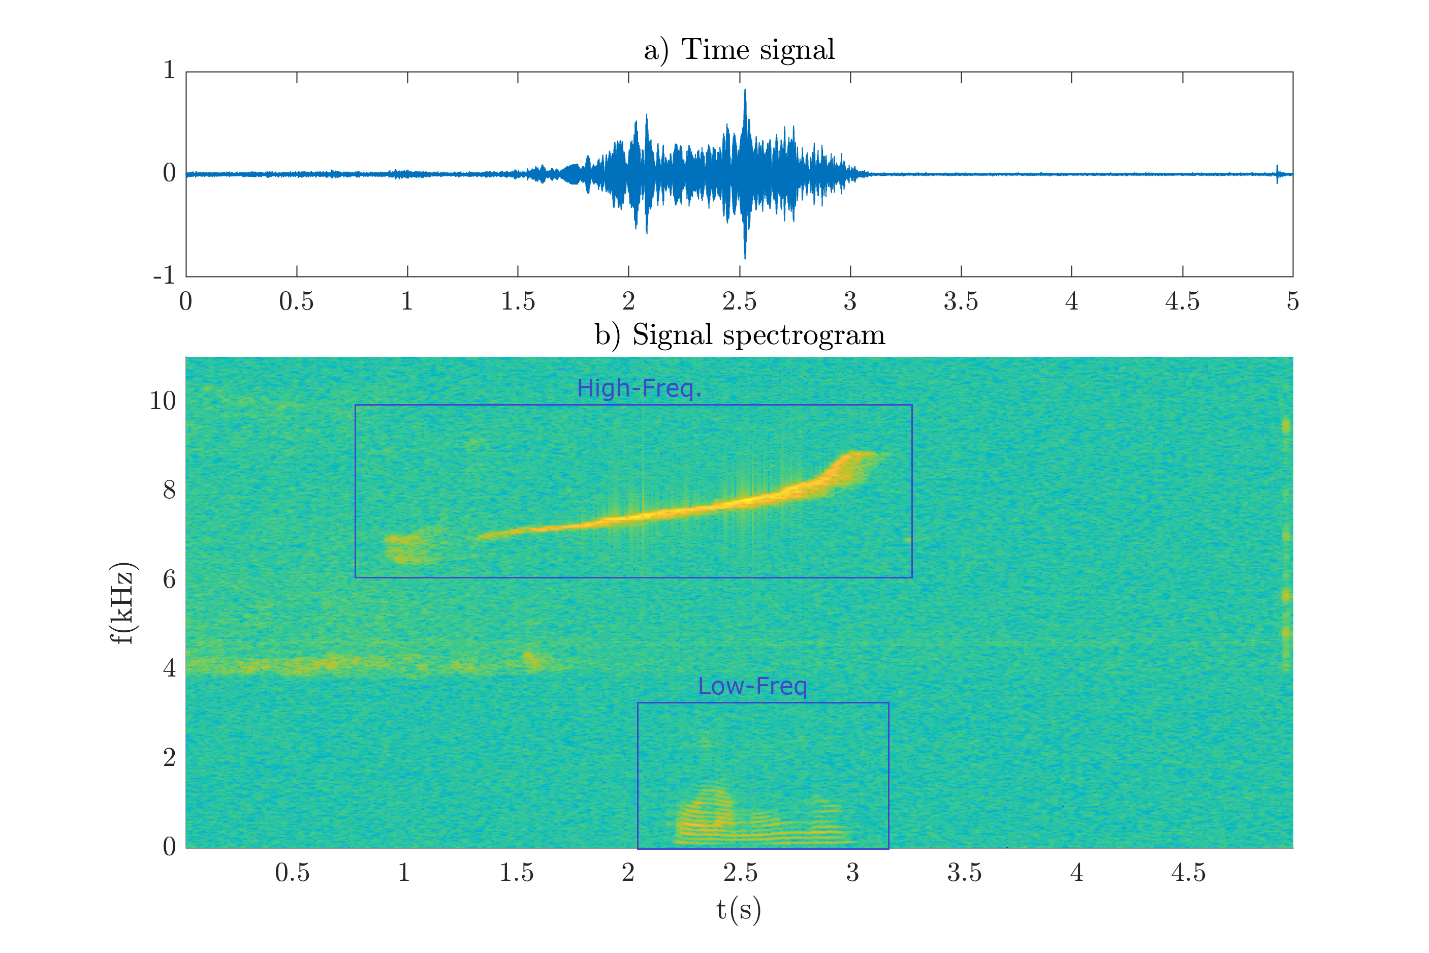

Figura 1. Visualização do sinal de áudio ‘UnknownSound.wav’; a) sinal no domínio tempo; b) espectrograma do sinal, estão destacados componentes de baixa frequência (Low-Freq.)  e componentes de alta frequência (High-Freq.).


In [ ]:
#Carrega o arquivo
fs, x = wavfile.read(Path + 'UnknownSound.wav')

#Tempo total = numero de amostras / fs
length = x.shape[0] / fs
print(f"duracao = {length}s")

duracao = 5.0s


In [ ]:
Audio(data = x, rate = fs)

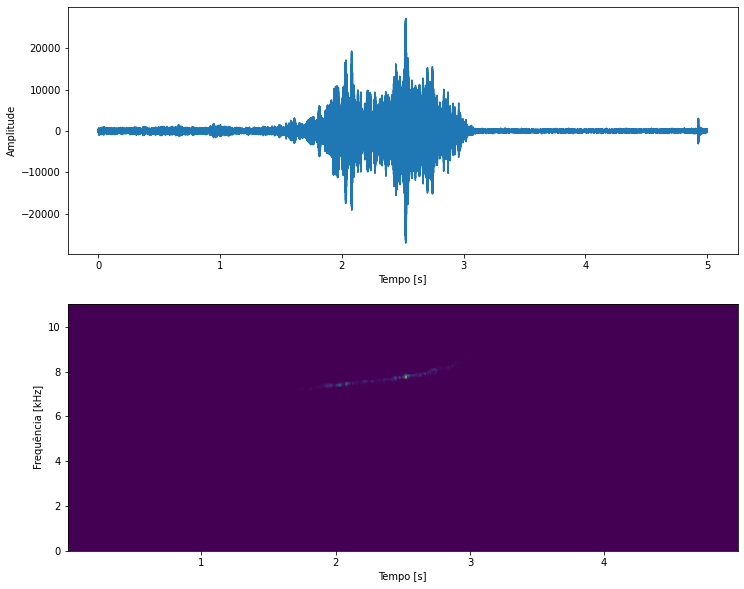

In [ ]:
#Plota as figuras ao longo do tempo

#Interpola para determinar eixo do tempo
time = np.linspace(0., length, x.shape[0])

#Plota a amplitude do sinal no tempo
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(time, x[:])
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

#Plota o espectograma do sinal no tempo
plt.subplot(2,1,2)
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f/1000, Sxx, shading='gouraud')
plt.ylabel('Frequência [kHz]')
plt.xlabel('Tempo [s]')

plt.show()

a) Usando o método de projeto de filtros FIR por janelamento, obtenha os coeficientes de um filtro passa-baixas que permita recuperar componente Low-Freq contido no sinal de áudio. Use um filtro com 101 coeficientes e a janela de Kaiser que permita uma atenuação de 100 dB na frequência de corte. Plote a resposta ao impulso e a resposta em frequência do filtro projetado.

In [ ]:
M1 = -50
M2 = 50

n = np.arange(M1,M2+1)

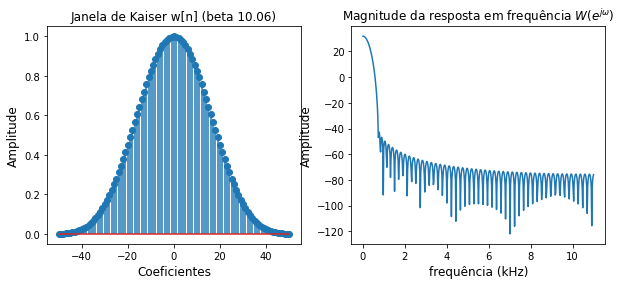

In [ ]:
# Create 
r = 100; # Set the dBs below the mainlobe magnitude.

# Kaiser window
beta = 0.1102*(r - 8.7)
M = 101
blp = signal.windows.kaiser(M,beta) #transpose for obtain a row vector

f, H_w =  signal.freqz(blp, 1, fs=fs)
W_dB = 20*np.log10(np.abs(H_w))
W_Phase = np.angle(H_w)

fig = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.stem(n,blp,use_line_collection='true')
plt.xlabel('Coeficientes',fontdict={'fontsize':12})
plt.ylabel('Amplitude',fontdict={'fontsize':12})
str = ' %.2f)' % beta
plt.title('Janela de Kaiser w[n] (beta' +str,fontdict={'fontsize':12})

plt.subplot(1,2,2)
plt.plot(f/1000,W_dB)
plt.xlabel('frequência (kHz)',fontdict={'fontsize':12})
plt.ylabel('Amplitude',fontdict={'fontsize':12})
plt.title('Magnitude da resposta em frequência $W(e^{j\omega})$',fontdict={'fontsize':12})

fig.show()

b) Usando os coeficientes do filtro projetado filtre o sinal de áudio. Mostre uma figura similar à Figura 1, mas construída a partir do sinal filtrado.

In [ ]:
ylp = signal.lfilter(blp,1,x)

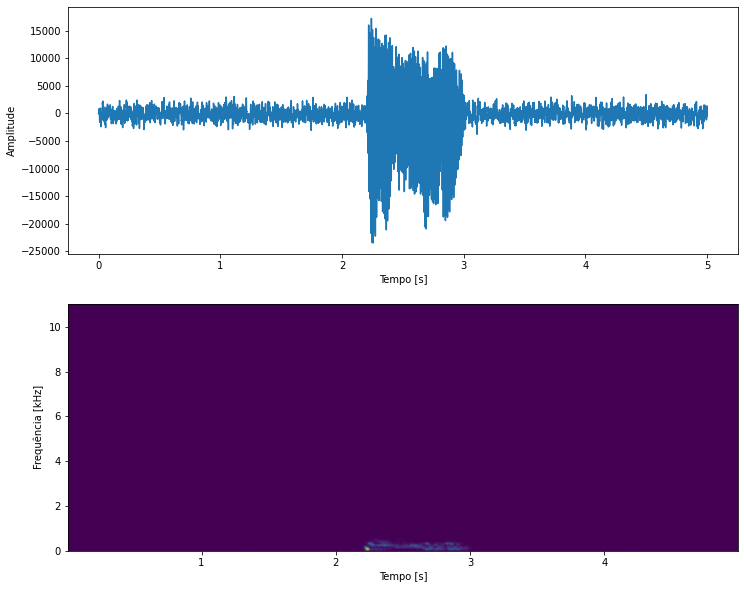

In [ ]:
#Plota a amplitude do sinal no tempo
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(time, ylp)
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

#Plota o espectograma do sinal no tempo
plt.subplot(2,1,2)
f, t, Sxx = signal.spectrogram(ylp, fs)
plt.pcolormesh(t, f/1000, Sxx, shading='gouraud')
plt.ylabel('Frequência [kHz]')
plt.xlabel('Tempo [s]')

plt.show()

In [ ]:
Audio(data = ylp, rate = fs)

# Exercício 2 – Obtenção de um filtro passa-altas

Baseado nos coeficientes do filtro obtido no exercício anterior:

a) Obtenha os coeficientes de um filtro passa-altas ($b_{HP}$) que permita recuperar componente High-Freq contido no sinal de áudio. Suponha que os coeficientes do filtro passa-baixas obtidos no exercício 1 foram armazenados no vetor $b_{LP}$.

In [ ]:
M = np.arange(0,101)

In [ ]:
bhp = blp*(-1)**M

In [ ]:
bhp

array([ 3.35096098e-04, -7.65035531e-04,  1.41221574e-03, -2.33651322e-03,
        3.60615833e-03, -5.29770666e-03,  7.49580968e-03, -1.02927674e-02,
        1.37878504e-02, -1.80863818e-02,  2.32985779e-02, -2.95381489e-02,
        3.69206686e-02, -4.55617298e-02,  5.55749062e-02, -6.70695487e-02,
        8.01484510e-02, -9.49054239e-02,  1.11422823e-01, -1.29769076e-01,
        1.49996270e-01, -1.72137837e-01,  1.96206409e-01, -2.22191890e-01,
        2.50059789e-01, -2.79749884e-01,  3.11175241e-01, -3.44221638e-01,
        3.78747432e-01, -4.14583881e-01,  4.51535945e-01, -4.89383580e-01,
        5.27883503e-01, -5.66771434e-01,  6.05764781e-01, -6.44565742e-01,
        6.82864771e-01, -7.20344364e-01,  7.56683105e-01, -7.91559902e-01,
        8.24658343e-01, -8.55671094e-01,  8.84304262e-01, -9.10281645e-01,
        9.33348780e-01, -9.53276731e-01,  9.69865528e-01, -9.82947201e-01,
        9.92388345e-01, -9.98092171e-01,  1.00000000e+00, -9.98092171e-01,
        9.92388345e-01, -

b) Usando os coeficientes do filtro passa-altas ($b_{HP}$) filtre o sinal de áudio original. Mostre uma figura similar à Figura 1, mas construída a partir do sinal filtrado mediante o filtro passa-altas.

In [ ]:
yhp = signal.lfilter(bhp,1,x)

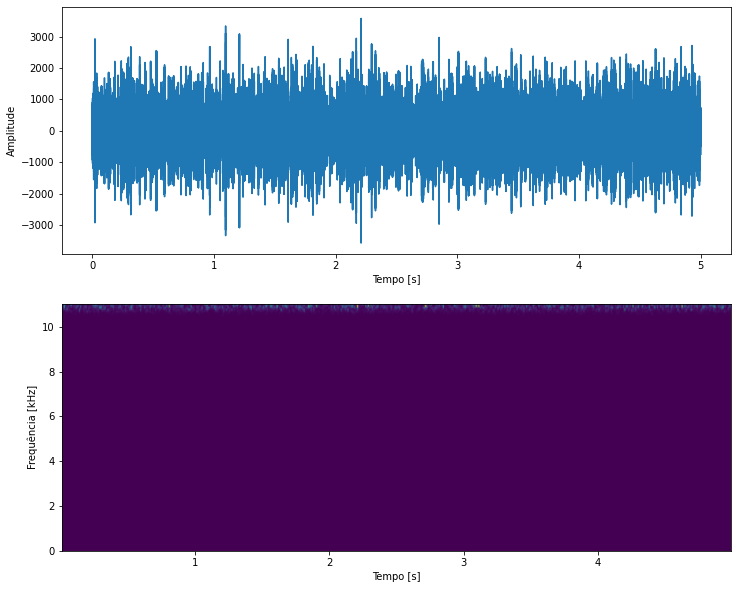

In [ ]:
#Plota a amplitude do sinal no tempo
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(time, yhp)
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")

#Plota o espectograma do sinal no tempo
plt.subplot(2,1,2)
f, t, Sxx = signal.spectrogram(yhp, fs)
plt.pcolormesh(t, f/1000, Sxx, shading='gouraud')
plt.ylabel('Frequência [kHz]')
plt.xlabel('Tempo [s]')

plt.show()

In [ ]:
Audio(data = yhp, rate = fs)

c) Explique por que os coeficientes do filtro $b_{HP}$ permitem obter uma resposta em frequência que atua como um sistema passa-altas. 
Dica: Lembre da propriedade de linearidade; verifique qual seria o espectro do impulso unitário de tempo discreto $\delta[n]$.

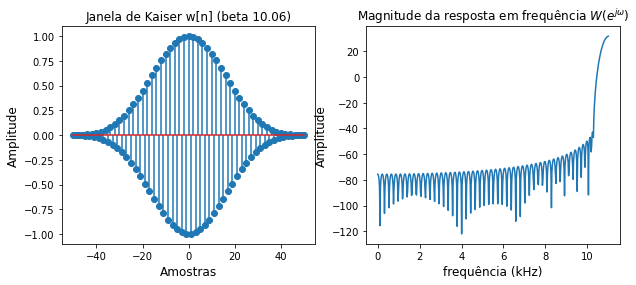

In [ ]:
f, H_w =  signal.freqz(bhp, 1, fs=fs)
W_dB = 20*np.log10(np.abs(H_w))
W_Phase = np.angle(H_w)

fig = plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.stem(n,bhp,use_line_collection='true')
plt.xlabel('Amostras',fontdict={'fontsize':12})
plt.ylabel('Amplitude',fontdict={'fontsize':12})
str = ' %.2f)' % beta
plt.title('Janela de Kaiser w[n] (beta' +str,fontdict={'fontsize':12})

plt.subplot(1,2,2)
plt.plot(f/1000,W_dB)
plt.xlabel('frequência (kHz)',fontdict={'fontsize':12})
plt.ylabel('Amplitude',fontdict={'fontsize':12})
plt.title('Magnitude da resposta em frequência $W(e^{j\omega})$',fontdict={'fontsize':12})

fig.show()